<a href="https://colab.research.google.com/github/Ayush060201/IDM_Course_Project1_Weather_dataset/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries
Let's import some libraries to get started!

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data
Let's start by reading in the titanic_train.csv file into a pandas dataframe.



In [9]:
weather = pd.read_csv('weather.csv')

<ipython-input-9-75d80ade1d65>:1: DtypeWarning: Columns (15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv('weather.csv')


In [10]:
weather.head()

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,...,LONGITUDE,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES
0,TZ000063894,Comoros,2020-01-22,2020.0,1.0,22.0,10.9,NaN,27.6,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TZ000063894,Comoros,2020-01-23,2020.0,1.0,23.0,0.0,NaN,26.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,2020-01-24,2020.0,1.0,24.0,9.4,NaN,27.9,30.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TZ000063894,Comoros,2020-01-25,2020.0,1.0,25.0,0.3,NaN,27.9,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TZ000063894,Comoros,2020-01-26,2020.0,1.0,26.0,0.0,NaN,28.2,31.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [11]:
weather.isnull().sum()

STATION                0
Country/Region         0
DATE                   0
Year                   1
Month                  1
Day                    1
PRCP               29833
SNWD               65531
TAVG                1029
TMAX               18718
TMIN               18185
SNOW               67490
LATITUDE           64624
LONGITUDE          64624
ELEVATION          64624
PRCP_ATTRIBUTES    72529
TAVG_ATTRIBUTES    72518
TMAX_ATTRIBUTES    72525
TMIN_ATTRIBUTES    72523
DAPR               72531
MDPR               72531
WESD               72531
SNWD_ATTRIBUTES    72531
dtype: int64

In [12]:
weather.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   STATION          72531 non-null  bool 
 1   Country/Region   72531 non-null  bool 
 2   DATE             72531 non-null  bool 
 3   Year             72531 non-null  bool 
 4   Month            72531 non-null  bool 
 5   Day              72531 non-null  bool 
 6   PRCP             72531 non-null  bool 
 7   SNWD             72531 non-null  bool 
 8   TAVG             72531 non-null  bool 
 9   TMAX             72531 non-null  bool 
 10  TMIN             72531 non-null  bool 
 11  SNOW             72531 non-null  bool 
 12  LATITUDE         72531 non-null  bool 
 13  LONGITUDE        72531 non-null  bool 
 14  ELEVATION        72531 non-null  bool 
 15  PRCP_ATTRIBUTES  72531 non-null  bool 
 16  TAVG_ATTRIBUTES  72531 non-null  bool 
 17  TMAX_ATTRIBUTES  72531 non-null  bool 
 18  TMIN_A

<Axes: >

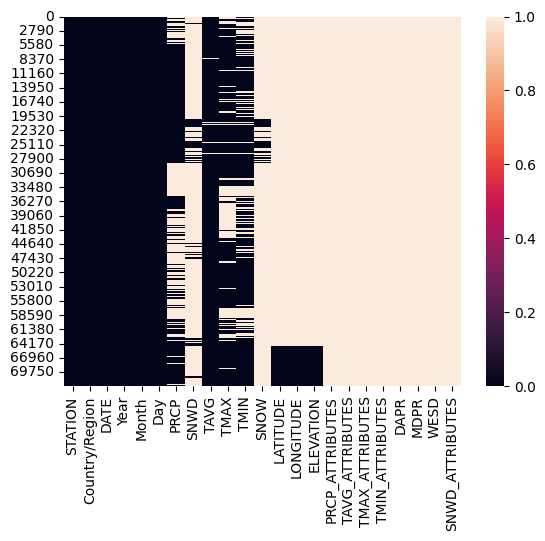

In [14]:
sns.heatmap(weather.isnull())

In [13]:
# Calculate the number of null values in each column
null_counts = weather.isnull().sum()

# Filter the columns with more than 20,000 null values
columns_with_many_nulls = null_counts[null_counts > 20000]

# Display the names of the columns with more than 20,000 null values
print(columns_with_many_nulls.index.tolist())

['PRCP', 'SNWD', 'SNOW', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES', 'DAPR', 'MDPR', 'WESD', 'SNWD_ATTRIBUTES']


In [15]:
weather = weather.drop(['SNWD', 'SNOW', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES', 'DAPR', 'MDPR', 'WESD', 'SNWD_ATTRIBUTES']
, axis = 1)

In [24]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATION         72531 non-null  object 
 1   Country/Region  72531 non-null  object 
 2   DATE            72531 non-null  object 
 3   Year            72530 non-null  float64
 4   Month           72530 non-null  float64
 5   Day             72530 non-null  float64
 6   PRCP            42698 non-null  float64
 7   TAVG            71502 non-null  float64
 8   TMAX            53813 non-null  float64
 9   TMIN            54346 non-null  float64
dtypes: float64(7), object(3)
memory usage: 5.5+ MB


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has be

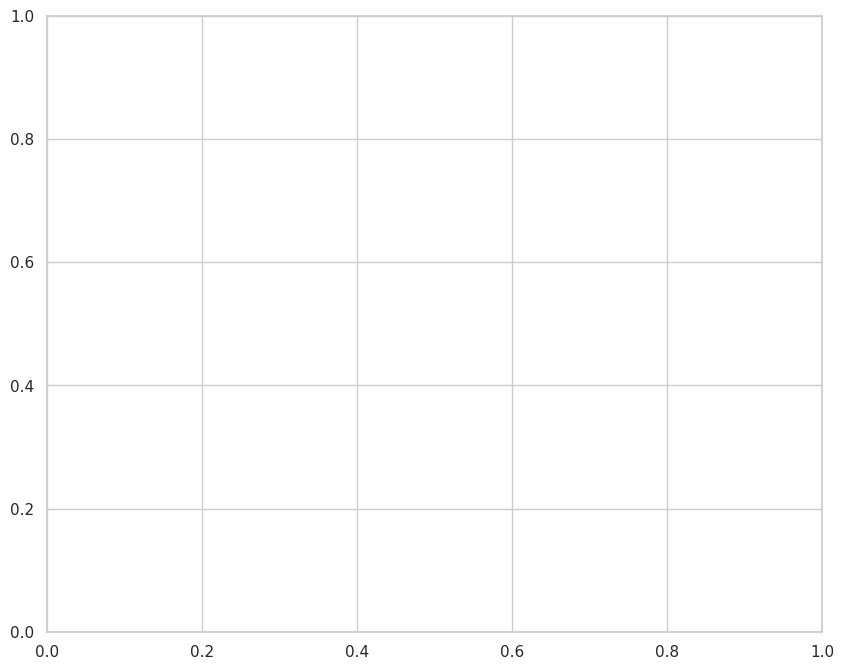

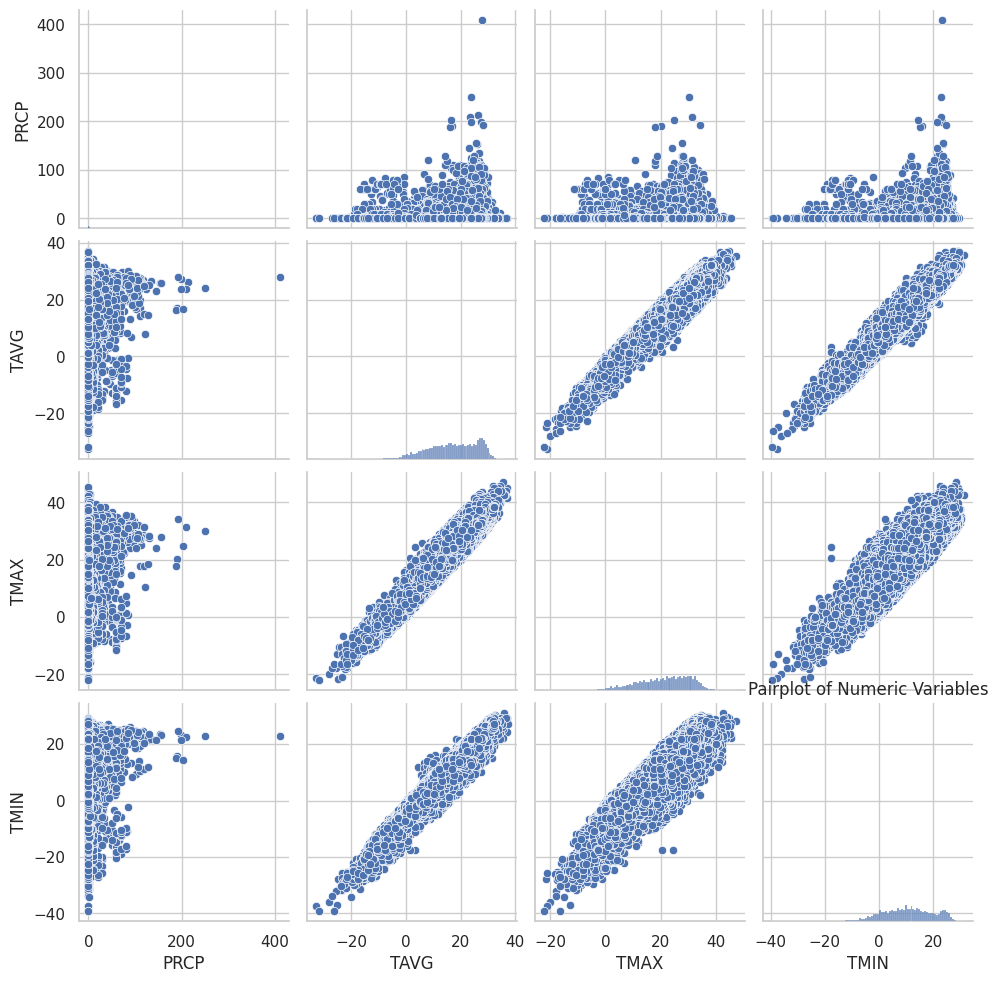

In [18]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Choose a color palette for your plots
palette = "Set2"  # You can choose other palettes from Seaborn
fig,ax = plt.subplots(figsize=(10, 8))
# Pairplot to visualize relationships between numeric columns
sns.pairplot(weather[['PRCP', 'TAVG', 'TMAX', 'TMIN']], palette=palette)
plt.title('Pairplot of Numeric Variables')
plt.show()



In [26]:
weather.columns

Index(['STATION', 'Country/Region', 'DATE', 'Year', 'Month', 'Day', 'PRCP',
       'TAVG', 'TMAX', 'TMIN'],
      dtype='object')

In [30]:
for column in weather.columns:
    if weather[column].dtype == 'object':
        weather[column].fillna('Unknown', inplace=True)
    else:
        weather[column].fillna(weather[column].mean(), inplace=True)


weather.to_csv('filled_data.csv', index=False)

In [31]:
weather.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   STATION         72531 non-null  bool 
 1   Country/Region  72531 non-null  bool 
 2   DATE            72531 non-null  bool 
 3   Year            72531 non-null  bool 
 4   Month           72531 non-null  bool 
 5   Day             72531 non-null  bool 
 6   PRCP            72531 non-null  bool 
 7   TAVG            72531 non-null  bool 
 8   TMAX            72531 non-null  bool 
 9   TMIN            72531 non-null  bool 
dtypes: bool(10)
memory usage: 708.4 KB


In [38]:
import math

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

import xgboost as xg

In [39]:
def linearRegressionLocal(X_df, Y_df):

    X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=1)

    model = LinearRegression()
    model.fit(X_train, y_train)


    # Make predictions on the training set
    y_pred_train = model.predict(X_train)

    # Make predictions on the testing set
    y_pred_test = model.predict(X_test)

    # Calculate training performance metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse = math.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_pred_train)

    # Calculate testing performance metrics
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = math.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_pred_test)

    return train_mse, train_rmse ,train_r2, test_mse, test_rmse, test_r2

In [46]:
X = weather[['Day','Month','PRCP', 'TMAX', 'TMIN']]
y = weather['TAVG']
train_mse, train_rmse ,train_r2, test_mse, test_rmse, test_r2 = linearRegressionLocal(X, y)
print("Training MSE:  ", train_mse)
print("Training RMSE: ", train_rmse)
print("Training R2:   ", train_r2)
print("Testing MSE:   ", test_mse)
print("Testing RMSE:  ", test_rmse)
print("Testing R2:    ", test_r2)

Training MSE:   19.898140888308802
Training RMSE:  4.460733223171814
Training R2:    0.7772346751877963
Testing MSE:    20.050848738718518
Testing RMSE:   4.477817407925262
Testing R2:     0.7732959387671815


In [47]:
def ridgeRegressionLocal(X_df, Y_df):

    X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=1)
    model = Ridge(alpha=0.1)

    model.fit(X_train, y_train)


    # Make predictions on the training set
    y_pred_train = model.predict(X_train)

    # Make predictions on the testing set
    y_pred_test = model.predict(X_test)

    # Calculate training performance metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse = math.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_pred_train)

    # Calculate testing performance metrics
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = math.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_pred_test)

    return train_mse, train_rmse ,train_r2, test_mse, test_rmse, test_r2

In [44]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(list(weather['Country/Region']))
weather['Country/Region_Category'] = weather['Country/Region'].apply(lambda x: le.transform([x])[0])
